In [66]:
ctemps = [5, 10, 12, 14, 10, 23, 41, 30, 12, 24, 12, 18, 29]

ftemps1 = [(t * 9/5) + 32 for t in ctemps]
ftemps2 = {(t * 9/5) + 32 for t in ctemps}
print("\n", ftemps1, type(ftemps1))
print("\n", ftemps2, type(ftemps2))


evens = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

list_evenSquared = [e ** 2 for e in evens]
print("\nList comprehension", list_evenSquared)

set_evenSquared = {e ** 2 for e in evens}
print("\nSet comprehension", set_evenSquared)


 [41.0, 50.0, 53.6, 57.2, 50.0, 73.4, 105.8, 86.0, 53.6, 75.2, 53.6, 64.4, 84.2] <class 'list'>

 {64.4, 73.4, 41.0, 105.8, 75.2, 50.0, 84.2, 53.6, 86.0, 57.2} <class 'set'>

List comprehension [4, 16, 36, 64, 100, 144, 196, 256, 324, 400]

Set comprehension {64, 256, 100, 4, 36, 196, 324, 16, 144, 400}


In [67]:
import numpy as np

a = np.array([[1, 2],
              [3, 4]])

b = np.array([[5, 6],
              [7, 8]])

print("Vertical stacking:", np.vstack((a, b)))

# horizontal stacking
print("Horizontal stacking:", np.hstack((a, b)))


c = [5, 6]
# stacking columns
print("Column stacking:", np.column_stack((a, c)))


Vertical stacking: [[1 2]
 [3 4]
 [5 6]
 [7 8]]
Horizontal stacking: [[1 2 5 6]
 [3 4 7 8]]
Column stacking: [[1 2 5]
 [3 4 6]]


In [68]:
import pandas as pd
import numpy as np
s = pd.Series([0, 1, 4, 9, 16, 25], name='squares')
print(s)
print(s.index)
print(s.values, s.index)
print(s[2:4])

0     0
1     1
2     4
3     9
4    16
5    25
Name: squares, dtype: int64
RangeIndex(start=0, stop=6, step=1)
[ 0  1  4  9 16 25] RangeIndex(start=0, stop=6, step=1)
2    4
3    9
Name: squares, dtype: int64


In [69]:
pop2014 = pd.Series([100, 99.3, 95.5, 93.5, 92.4, 84.8, 84.5, 78.9, 74.3, 72.8],
                    index=['Java', 'C', 'C++', 'Python', 'C#', 'PHP', 'JavaScript', 'Ruby', 'R', 'Matlab'])

pop2015 = pd.Series({'Java': 100, 'C': 99.9, 'C++': 99.4, 'Python': 96.5, 'C#': 91.3,
                     'R': 84.8, 'PHP': 84.5, 'JavaScript': 83.0, 'Ruby': 76.2, 'Matlab': 72.4})

print(pop2014)

print(pop2015) # index sort

Java          100.0
C              99.3
C++            95.5
Python         93.5
C#             92.4
PHP            84.8
JavaScript     84.5
Ruby           78.9
R              74.3
Matlab         72.8
dtype: float64
Java          100.0
C              99.9
C++            99.4
Python         96.5
C#             91.3
R              84.8
PHP            84.5
JavaScript     83.0
Ruby           76.2
Matlab         72.4
dtype: float64


In [70]:
print(pop2014.index)
print(pop2014.iloc[0:2])

print(pop2014.loc[:'Ruby'])

Index(['Java', 'C', 'C++', 'Python', 'C#', 'PHP', 'JavaScript', 'Ruby', 'R',
       'Matlab'],
      dtype='object')
Java    100.0
C        99.3
dtype: float64
Java          100.0
C              99.3
C++            95.5
Python         93.5
C#             92.4
PHP            84.8
JavaScript     84.5
Ruby           78.9
dtype: float64


loc gets rows (or columns) with particular labels from the index.

iloc gets rows (or columns) at particular positions in the index (so it only takes integers).

ix usually tries to behave like loc but falls back to behaving like iloc if a label is not present in the index

In [71]:
twoyears = pd.DataFrame({'2014': pop2014, '2015': pop2015})
print(twoyears)

             2014   2015
C            99.3   99.9
C#           92.4   91.3
C++          95.5   99.4
Java        100.0  100.0
JavaScript   84.5   83.0
Matlab       72.8   72.4
PHP          84.8   84.5
Python       93.5   96.5
R            74.3   84.8
Ruby         78.9   76.2


In [72]:
twoyears['Average'] = 0.5*(twoyears['2014'] + twoyears['2015']) 
print(twoyears)

             2014   2015  Average
C            99.3   99.9    99.60
C#           92.4   91.3    91.85
C++          95.5   99.4    97.45
Java        100.0  100.0   100.00
JavaScript   84.5   83.0    83.75
Matlab       72.8   72.4    72.60
PHP          84.8   84.5    84.65
Python       93.5   96.5    95.00
R            74.3   84.8    79.55
Ruby         78.9   76.2    77.55


In [73]:
test_data = pd.DataFrame(np.random.choice(['a', 'b', 'c', 'e'], (3, 3)), index=[1, 2, 3], columns=['AA', 'BB', 'CC'])
print(test_data)

  AA BB CC
1  e  a  a
2  c  e  b
3  a  a  c


# pandas aggregation

In [74]:
open('tips.csv','r').readlines()[:10]

['total_bill,tip,gender,smoker,day,time,size\n',
 '16.99,1.01,Female,No,Sun,Dinner,2\n',
 '10.34,1.66,Male,No,Sun,Dinner,3\n',
 '21.01,3.5,Male,No,Sun,Dinner,3\n',
 '23.68,3.31,Male,No,Sun,Dinner,2\n',
 '24.59,3.61,Female,No,Sun,Dinner,4\n',
 '25.29,4.71,Male,No,Sun,Dinner,4\n',
 '8.77,2,Male,No,Sun,Dinner,2\n',
 '26.88,3.12,Male,No,Sun,Dinner,4\n',
 '15.04,1.96,Male,No,Sun,Dinner,2\n']

In [75]:
tips = pd.read_csv('tips.csv')

In [76]:
tips.head()

,total_bill,tip,gender,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [77]:
tips.mean()

total_bill    19.785943
tip            2.998279
size           2.569672
dtype: float64

In [78]:
tips.dtypes

total_bill    float64
tip           float64
gender         object
smoker         object
day            object
time           object
size            int64
dtype: object

In [79]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [80]:
tips.shape # row count

(244, 7)

In [81]:
tips.groupby('gender').mean()

,total_bill,tip,size
gender,,,
Female,18.056897,2.833448,2.459770
Male,20.744076,3.089618,2.630573


In [82]:
tips.groupby(['gender','smoker']).mean()

total_bill       tip      size
gender smoker                                
Female No       18.105185  2.773519  2.592593
       Yes      17.977879  2.931515  2.242424
Male   No       19.791237  3.113402  2.711340
       Yes      22.284500  3.051167  2.500000

In [83]:
pd.pivot_table(tips,'total_bill','gender','smoker')

# pandas.pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', 
#         fill_value=None, margins=False, dropna=True, margins_name='All')

# Create a spreadsheet-style pivot table as a DataFrame.

smoker,No,Yes
gender,,
Female,18.105185,17.977879
Male,19.791237,22.284500


In [84]:
pd.pivot_table(tips,'total_bill',['gender','smoker'],['day','time'])
# pandas.pivot_table(data, values=None, index=None, columns=None, aggfunc='mean')


day               Fri                   Sat        Sun   Thur           
time           Dinner      Lunch     Dinner     Dinner Dinner      Lunch
gender smoker                                                           
Female No      22.750  15.980000  19.003846  20.824286  18.78  15.899167
       Yes     12.200  13.260000  20.266667  16.540000    NaN  19.218571
Male   No      17.475        NaN  19.929063  20.403256    NaN  18.486500
       Yes     25.892  11.386667  21.837778  26.141333    NaN  19.171000

# Data Frame Creation and visualization 

In [85]:
import pandas as pd
from matplotlib import pyplot as plt
url='http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(url, header = None)

df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [86]:
df.columns = ['sepal_length','sepal_width','petal_length','petal_width','flower_type']
df['flower_type'] = df['flower_type'].astype('category')
df.flower_type = df.flower_type.cat.rename_categories([0,1,2])

df.head()

,sepal_length,sepal_width,petal_length,petal_width,flower_type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [87]:
df['flower_type'].describe()

count     150
unique      3
top         0
freq       50
Name: flower_type, dtype: int64

s = pd.Series(['a', 'a', 'b', 'c'])

s.describe()

count     4
unique    3
top       a
freq      2
dtype: object

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html


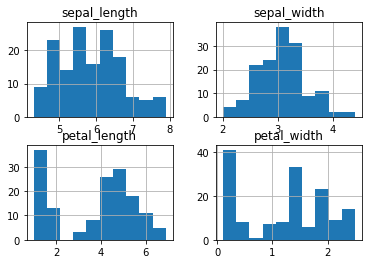

In [88]:
df.hist()
plt.show()

In [89]:
pd.scatter_matrix(df, diagonal='kde')
plt.show()

AttributeError: module 'pandas' has no attribute 'scatter_matrix'

‘bar’ or ‘barh’ for bar plots
‘hist’ for histogram
‘box’ for boxplot
‘kde’ or ‘density’ for density plots
‘area’ for area plots
‘scatter’ for scatter plots
‘hexbin’ for hexagonal bin plots
‘pie’ for pie plots
https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#visualization-kde



More general:
http://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html


# More Operations on the Data Frame

In [ ]:
df = df.sort_values(by='sepal_width')
df.head()

In [ ]:
# Normalizing your data set
df=df.ix[:,0:4].apply( lambda f: ( f - f.mean() )/( f.max() - f.min() ) )
df.hist()
plt.show()

In [ ]:
# Get a random sample from the data set
df=df.sample(frac=1.0)
df.head()

In [ ]:
# Split the data set into test and train set
train=df.sample(frac=0.8,random_state=123)
test=df.drop(train.index)

# Read/Write

In [ ]:
df.to_csv('iris_normalized.csv')
new_df = pd.read_csv('iris_normalized.csv')
new_df.head()

# Deal with missing data 

In [ ]:
import numpy as np
df = pd.DataFrame([[np.nan, 2, np.nan, 0],
                    [3, 4, np.nan, 1],
                    [np.nan, np.nan, np.nan, 5],
                    [np.nan, 3, np.nan, 4]],
                    columns=list('ABCD'))
df

In [ ]:
df.fillna(0)

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html#pandas.DataFrame.fillna

In [ ]:
 df = pd.DataFrame({"name": ['Alfred', 'Batman', 'Catwoman'],
                    "toy": [np.nan, 'Batmobile', 'Bullwhip'],
                    "born": [pd.NaT, pd.Timestamp("1940-04-25"),
                             pd.NaT]})
df

In computer programming, a sentinel value (also referred to as a flag value, trip value, rogue value, signal value, or dummy data) is a special value in the context of an algorithm which uses its presence as a condition of termination, typically in a loop or recursive algorithm.

floating-point NaN

In [ ]:
df.dropna()

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html#pandas.DataFrame.dropna

# Features extraction

# Text Features

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

sample = ['sample of evil', 'evil queen', 'horizon problem']
vec = CountVectorizer()
X = vec.fit_transform(sample)
# print(X.toarray())
feature_extraction = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
print(feature_extraction)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer()
X = vec.fit_transform(sample)
feature_extraction = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
print(feature_extraction)

# Derived Features

In [ ]:
%matplotlib inline 
# For jupyter notebook only
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])
plt.scatter(x, y)
plt.plot(x,y)
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])
X = x[:, np.newaxis]
model = LinearRegression().fit(X, y)
yfit = model.predict(X)
plt.scatter(x,y)
plt.plot(x, yfit)
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])
X = x[:, np.newaxis]
print("X\n", X)
poly = PolynomialFeatures(degree=3, include_bias=False)
X2 = poly.fit_transform(X)
# https://datascience.stackexchange.com/questions/12321/difference-between-fit-and-fit-transform-in-scikit-learn-models
print("\nX2\n", X2)


model = LinearRegression().fit(X2, y)
yfit = model.predict(X2)
plt.scatter(x,y)
plt.plot(x, yfit)
plt.show()


#     degree : integer
#     The degree of the polynomial features

#     include_bias : boolean
#     If True (default), then include a bias column,
#     the feature in which all polynomial powers are zero
#     (i.e. a column of ones - acts as an intercept term in a linear model).


#     rows = np.array([0, 3], dtype=np.intp)
#     columns = np.array([0, 2], dtype=np.intp)
#     rows[:, np.newaxis]
#     array([[0],
#        [3]])

#     # intp	Integer used for indexing (same as C ssize_t; normally either int32 or int64



# Scipy

• A collection of mathematical algorithms

• Gives Python similar capabilities as Matlab

• Many submodules are used for different domains

• We will see examples from linalg and optimize submodules

• For details: http://docs.scipy.org/doc/scipy/reference/tutorial/index.html

linalg: Linear Algebra submodule

Linear algebra submodule provides several routines for matrix computations.
For example to find the inverse of matrix A

In [ ]:
from scipy import linalg as la
import numpy as np
A = np.array([[5,3,5],[2,2,0], [1,3,1]])
iA = la.inv(A)
print(iA)

# Solving linear systems of equations
Ax=b

In [ ]:
A = np.array([[5,3,5], [2,2,0], [1,3,1]])
b = np.array([ 2, 5, 1])
x = la.solve(A,b)
print('Solution:', x)
# x = la.inv(A).dot(b) # same result

# More Will Come...

# http://book.pythontips.com/en/latest/map_filter.html
    
map filter reduce